<a href="https://colab.research.google.com/github/derrickgzq/fyp/blob/main/fyp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Granger-causality for PPI and CPI in Malaysia


In [ ]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
import plotly.express as px
from pmdarima.arima import auto_arima

Get data from github

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/derrickgzq/fyp/main/fyp%20data.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date').rename_axis('Indexes', axis=1)

In [31]:
df = df.loc['2015-01-01':'2022-12-01']

EDA

In [32]:
df.head()

Indexes,PPI,CPI
date,,
2015-01-01,104.1,110.6
2015-02-01,104.6,109.9
2015-03-01,103.8,110.9
2015-04-01,103.1,111.9
2015-05-01,101.6,112.3


In [33]:
df.tail()

Indexes,PPI,CPI
date,,
2022-08-01,120.9,128.2
2022-09-01,119.2,128.3
2022-10-01,119.3,128.6
2022-11-01,120.0,129.0
2022-12-01,119.6,129.2


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2015-01-01 to 2022-12-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PPI     96 non-null     float64
 1   CPI     96 non-null     float64
dtypes: float64(2)
memory usage: 2.2 KB


In [35]:
df.describe()

Indexes,PPI,CPI
count,96.000000,96.000000
mean,107.309375,120.007292
std,6.419232,4.339906
min,99.000000,109.900000
25%,102.675000,117.400000
50%,106.300000,120.650000
75%,109.000000,122.400000
max,124.100000,129.200000


Visualizations

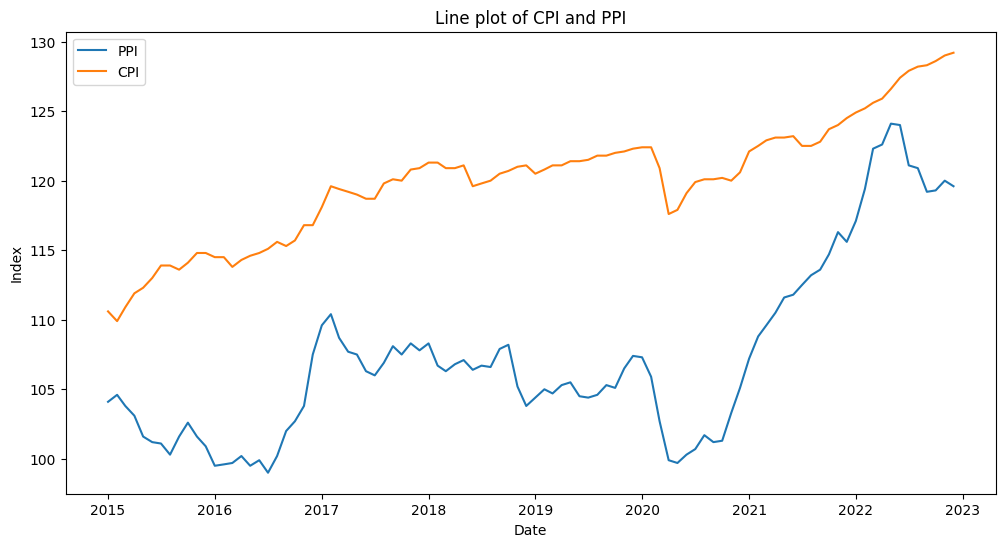

In [36]:
plt.figure(figsize = (12, 6))
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('Line plot of CPI and PPI')
plt.legend(df)
plt.show()

Test for stationarity

In [11]:
def adf_test(df):
    result = adfuller(df.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])

In [12]:
def kpss_test(df):
    statistic, p_value, n_lags, critical_values = kpss(df.values)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')

In [ ]:
print('ADF Test: PPI time series')
adf_test(df['PPI'])
print(' ')
print('ADF Test: CPI time series')
adf_test(df['CPI'])

ADF Test: PPI time series
ADF Statistics: -0.923992
p-value: 0.779969
 
ADF Test: CPI time series
ADF Statistics: -0.804085
p-value: 0.817919


ADF tests show PPI and CPI aren't stationary

In [ ]:
print('KPSS Test: PPI time series')
kpss_test(df['PPI'])
print('KPSS Test: CPI time series')
kpss_test(df['CPI'])

KPSS Test: PPI time series
KPSS Statistic: 0.9090131609515705
p-value: 0.01
num lags: 5
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: CPI time series
KPSS Statistic: 1.4444224903130523
p-value: 0.01
num lags: 5
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


<ipython-input-12-b4a13b7d81a1>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df.values)
<ipython-input-12-b4a13b7d81a1>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df.values)


In [38]:
df_diff = df.diff().dropna()

In [39]:
fig = px.line(df_diff, facet_col = 'Indexes', facet_col_wrap = 1)
fig.update_yaxes(matches = None)
fig.show()

In [40]:
print('KPSS Test: PPI time series')
kpss_test(df_diff['PPI'])
print('\nKPSS Test: CPI time series')
kpss_test(df_diff['CPI'])
print('\nADF Test: PPI time series')
adf_test(df_diff['PPI'])
print('\nADF Test: CPI time series')
adf_test(df_diff['CPI'])

KPSS Test: PPI time series
KPSS Statistic: 0.15618995760126497
p-value: 0.1
num lags: 4
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739

KPSS Test: CPI time series
KPSS Statistic: 0.11404346308216431
p-value: 0.1
num lags: 1
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739

ADF Test: PPI time series
ADF Statistics: -6.051938
p-value: 0.000000

ADF Test: CPI time series
ADF Statistics: -6.970126
p-value: 0.000000


<ipython-input-12-b4a13b7d81a1>:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


<ipython-input-12-b4a13b7d81a1>:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




ARIMA model

In [ ]:
#CPI
cpi = auto_arima(df_diff[['CPI']], seasonal = True, m = 12, stepwise = True, suppress_warnings = True, error_action = 'ignore',
                   information_criterion='aic')

In [ ]:
print(cpi.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   95
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 -83.533
Date:                Sat, 11 Nov 2023   AIC                            173.065
Time:                        08:09:28   BIC                            180.727
Sample:                    02-01-2015   HQIC                           176.161
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1909      0.100      1.908      0.056      -0.005       0.387
ma.L1          0.4090      0.073      5.622      0.000       0.266       0.552
sigma2         0.3392      0.032     10.508      0.0

In [ ]:
#PPI
ppi = auto_arima(df_diff[['PPI']], seasonal = True, m = 12, stepwise = True, suppress_warnings = True, error_action = 'ignore',
                   information_criterion='aic')

In [ ]:
print(ppi.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   95
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -144.156
Date:                Sat, 11 Nov 2023   AIC                            292.312
Time:                        08:09:37   BIC                            297.420
Sample:                    02-01-2015   HQIC                           294.376
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4356      0.102      4.274      0.000       0.236       0.635
sigma2         1.2150      0.167      7.284      0.000       0.888       1.542
Ljung-Box (L1) (Q):                   0.01   Jarque-

VAR model

In [45]:
model = VAR(df_diff)
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
  results = model.fit(i)
  print('Lag Order =', i)
  print('AIC : ', results.aic)
  print('BIC : ', results.bic)
  print('FPE : ', results.fpe, '\n')

Lag Order = 1
AIC :  -0.9227569488437204
BIC :  -0.7604189840179754
FPE :  0.39743909397230165 

Lag Order = 2
AIC :  -0.9369135747376378
BIC :  -0.6645910485921265
FPE :  0.3919166811798592 

Lag Order = 3
AIC :  -0.8887847855664883
BIC :  -0.5050343499285909
FPE :  0.4113974811694055 

Lag Order = 4
AIC :  -0.8395716526813531
BIC :  -0.3429181239197785
FPE :  0.4324562253318811 

Lag Order = 5
AIC :  -0.7967766272999735
BIC :  -0.18571204121924212
FPE :  0.45188832988945915 

Lag Order = 6
AIC :  -0.7326417019157719
BIC :  -0.005624335477169229
FPE :  0.48266501395287065 

Lag Order = 7
AIC :  -0.6531515810293942
BIC :  0.19139506026999453
FPE :  0.5239124605244182 

Lag Order = 8
AIC :  -0.6115180074163926
BIC :  0.3521702228624102
FPE :  0.5480789743530025 

Lag Order = 9
AIC :  -0.5203544951407326
BIC :  0.564124542738724
FPE :  0.6031797922024613 

Lag Order = 10
AIC :  -0.484181822370358
BIC :  0.7227752690719158
FPE :  0.6292006372633947 

Lag Order = 11
AIC :  -0.3767050016556

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Compare between ARIMA dan VAR, VAR model is way better, in terms of AIC and BIC already, so we will proceed with VAR.

Lag order 2 is chose because lowest AIC and FPE

In [46]:
results = model.fit(maxlags = 2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 12, Nov, 2023
Time:                     13:09:56
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  -0.664591
Nobs:                     93.0000    HQIC:                 -0.826958
Log likelihood:          -210.356    FPE:                   0.391917
AIC:                    -0.936914    Det(Omega_mle):        0.352945
--------------------------------------------------------------------
Results for equation PPI
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const          0.147229         0.126315            1.166           0.244
L1.PPI         0.461405         0.109663            4.207           0.000
L1.CPI        -0.124266         0.216483           -0.574           0.566
L2.PPI         0

## Check whether is PPI a predictive of CPI

In [ ]:
for i in [1,2,3]:
  grangercausalitytests(df[['CPI', 'PPI']], maxlag = [i])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0464  , p=0.1546  , df_denom=154, df_num=1
ssr based chi2 test:   chi2=2.0862  , p=0.1486  , df=1
likelihood ratio test: chi2=2.0725  , p=0.1500  , df=1
parameter F test:         F=2.0464  , p=0.1546  , df_denom=154, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.9018  , p=0.0005  , df_denom=151, df_num=2
ssr based chi2 test:   chi2=16.3269 , p=0.0003  , df=2
likelihood ratio test: chi2=15.5278 , p=0.0004  , df=2
parameter F test:         F=7.9018  , p=0.0005  , df_denom=151, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.1530  , p=0.0006  , df_denom=148, df_num=3
ssr based chi2 test:   chi2=19.3320 , p=0.0002  , df=3
likelihood ratio test: chi2=18.2181 , p=0.0004  , df=3
parameter F test:         F=6.1530  , p=0.0006  , df_denom=148, df_num=3


Check whether CPI is a predictive of PPI

In [ ]:
for i in [1,2,3]:
  grangercausalitytests(df[['PPI', 'CPI']], maxlag = [i])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0300  , p=0.8628  , df_denom=154, df_num=1
ssr based chi2 test:   chi2=0.0306  , p=0.8612  , df=1
likelihood ratio test: chi2=0.0306  , p=0.8612  , df=1
parameter F test:         F=0.0300  , p=0.8628  , df_denom=154, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0874  , p=0.9163  , df_denom=151, df_num=2
ssr based chi2 test:   chi2=0.1806  , p=0.9136  , df=2
likelihood ratio test: chi2=0.1805  , p=0.9137  , df=2
parameter F test:         F=0.0874  , p=0.9163  , df_denom=151, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0756  , p=0.9731  , df_denom=148, df_num=3
ssr based chi2 test:   chi2=0.2375  , p=0.9713  , df=3
likelihood ratio test: chi2=0.2373  , p=0.9714  , df=3
parameter F test:         F=0.0756  , p=0.9731  , df_denom=148, df_num=3


## Granger-Causality matrix

In [47]:
maxlag = 2
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df_diff, variables = df_diff.columns)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results



,PPI_x,CPI_x
PPI_y,1.0000,0.5306
CPI_y,0.0006,1.0000


Lets compare in terms of the state with highest and lowest GDP (Selangor and Perlis)

In [ ]:
df_state = pd.read_csv('https://raw.githubusercontent.com/derrickgzq/fyp/main/data%20of%20states%20cpi_completed.csv')

In [ ]:
df_state = df_state[['Date', 'Selangor', 'Perlis','PPI']]

In [ ]:
df_state['Date'] = pd.to_datetime(df_state['Date'])
df_state = df_state.set_index('Date').rename_axis('Indexes', axis=1)

In [ ]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2021-01-01 to 2023-08-01
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Selangor  32 non-null     float64
 1   Perlis    32 non-null     float64
 2   PPI       32 non-null     float64
dtypes: float64(3)
memory usage: 1.0 KB


In [ ]:
df_state.head()

Indexes,Selangor,Perlis,PPI
Date,,,
2021-01-01,125.7,115.5,107.2
2021-02-01,126.0,115.9,108.8
2021-03-01,126.5,116.2,109.6
2021-04-01,126.6,116.2,110.5
2021-05-01,126.7,116.3,111.6


In [ ]:
dfs = df_state

In [ ]:
dfs.head()

Indexes,Selangor,Perlis,PPI
Date,,,
2021-01-01,125.7,115.5,107.2
2021-02-01,126.0,115.9,108.8
2021-03-01,126.5,116.2,109.6
2021-04-01,126.6,116.2,110.5
2021-05-01,126.7,116.3,111.6


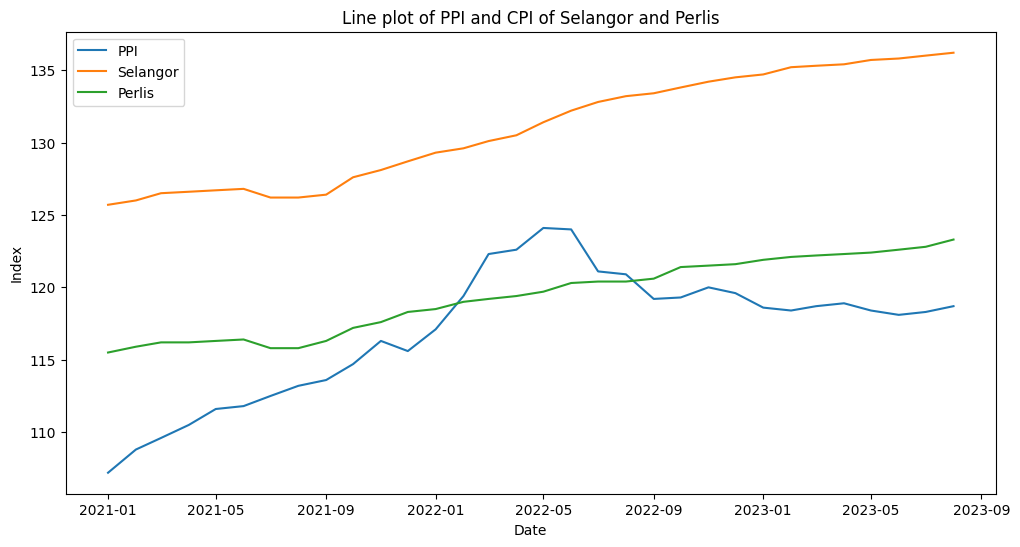

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(dfs[['PPI','Selangor','Perlis']])
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('Line plot of PPI and CPI of Selangor and Perlis')
plt.legend(dfs[['PPI','Selangor','Perlis']])
plt.show()

In [ ]:
dfs_diff = dfs.diff().dropna()

In [ ]:
fig = px.line(dfs_diff, facet_col = 'Indexes', facet_col_wrap = 1)
fig.update_yaxes(matches = None)
fig.show()

In [ ]:
for i in dfs_diff.columns:
  print('ADF test for ',i)
  adf_test(dfs_diff[i])
  print('\nKPSS test for ',i)
  kpss_test(dfs_diff[i])
  print(' ')

ADF test for  Selangor
ADF Statistics: -2.146921
p-value: 0.226070

KPSS test for  Selangor
KPSS Statistic: 0.13525002827594113
p-value: 0.1
num lags: 3
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
 
ADF test for  Perlis
ADF Statistics: -4.068523
p-value: 0.001091

KPSS test for  Perlis
KPSS Statistic: 0.08041330053392216
p-value: 0.1
num lags: 1
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
 
ADF test for  PPI
ADF Statistics: -3.777777
p-value: 0.003143

KPSS test for  PPI
KPSS Statistic: 0.426668152037163
p-value: 0.0656602792943263
num lags: 2
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
 


<ipython-input-10-b4a13b7d81a1>:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


<ipython-input-10-b4a13b7d81a1>:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [ ]:
model = VAR(dfs_diff)
for i in [1,2,3,4,5,6]:
  results = model.fit(i)
  print('Lag Order =', i)
  print('AIC : ', results.aic)
  print('BIC : ', results.bic)
  print('FPE : ', results.fpe, '\n')

Lag Order = 1
AIC :  -5.0834892328351575
BIC :  -4.523010280170295
FPE :  0.006228017139225892 

Lag Order = 2
AIC :  -4.772233124406894
BIC :  -3.7821223509684123
FPE :  0.008711776646079507 

Lag Order = 3
AIC :  -4.56305700716301
BIC :  -3.1356950319752914
FPE :  0.011513086379612819 

Lag Order = 4
AIC :  -4.217318326248227
BIC :  -2.345553964241974
FPE :  0.019125345355262325 

Lag Order = 5
AIC :  -5.128352736893889
BIC :  -2.8057129743926916
FPE :  0.010939153590226649 

Lag Order = 6
AIC :  -10.226878872627395
BIC :  -7.447841991927899
FPE :  0.00014929469619115896 



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Lag order 1 is the best, with lowest AIC, BIC and FPE

In [ ]:
maxlag = 6
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(dfs_diff, variables = dfs_diff.columns)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1

,Selangor_x,Perlis_x,PPI_x
Selangor_y,1.000,0.0346,0.0118
Perlis_y,0.014,1.0000,0.1074
PPI_y,0.000,0.2939,1.0000
